# Research Report: Investigating a Coherence Between Living Standard and Military Expenditures

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#credits">Credits</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will investigate some data from Gapminder - an independent Swedish foundation with no political, religious or economic affiliations. 

We will work with the following data files to look for the possible trends and correlations:

**1. Military expenditure (% of GDP)**

> Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects; paramilitary forces, if these are judged to be trained and equipped for military operations; and military space activities. Such expenditures include military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country). Excluded are civil defense and current expenditures for previous military activities, such as for veterans' benefits, demobilization, conversion, and destruction of weapons. This definition cannot be applied for all countries, however, since that would require much more detailed information than is available about what is included in military budgets and off-budget military expenditure items. 

**2. Income per person (GDP/capita, PPP$ inflation-adjusted)**

> Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP). © Gapminder based on World Bank, A. Maddison, M. Lindgren, IMF & more.

**3. Human Development Index (HDI)**

> Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.

![HDI](http://hdr.undp.org/sites/default/files/hdi.png)
Image source: http://hdr.undp.org/

**4. Total health spending (% of GDP)**

> The sum of public and private health expenditure as a percentage of GDP.

Data source: https://www.gapminder.org/data/

## Research questions

1. A: Are higher / lower HDI countries spending more on health or on the military? B: Are all countries always spending more on health rather than on the military?

2. Is there a strong correlation between income per capita and military spending?

3. Is world spending more % of GDP on the military throughout the years?

4. Do countries with higher HDI spend larger % of GDP on health?

5. Did the distribution shape of personal income change throughout the years?

In [49]:
# Prepare the workspace:

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex, Normalize
% matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
pd.set_option('mode.chained_assignment', None)

import seaborn as sns
sns.set_style('darkgrid')

from mpl_toolkits.basemap import Basemap

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Explore the inicial data:

df_mil = pd.read_csv("military_expenditure_percent_of_gdp.csv") # "mil" for military
df_mil.name = "military_expenditure_percent_of_gdp"
df_inc = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv") # "inc" for income
df_inc.name = "income_per_person_gdppercapita_ppp"
df_hdi = pd.read_csv("hdi_human_development_index.csv") # "hdi" for human development index
df_hdi.name = "hdi_human_development_index"
df_hea = pd.read_csv("total_health_spending_percent_of_gdp.csv") # "hea" for health
df_hea.name = "total_health_spending_percent_of_gdp"

data_list = [df_mil, df_inc, df_hdi, df_hea]
for data in data_list:
    print(data.name)
    print(data.shape)
    print(data.head())
    print("\n")

military_expenditure_percent_of_gdp
(165, 59)
           geo  1960  1961  1962  1963  1964   1965   1966  1967  1968  ...    \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  ...     
1      Albania   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  ...     
2      Algeria   NaN   NaN   NaN  2.46  3.43  3.360  3.440  2.94  2.58  ...     
3       Angola   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  ...     
4    Argentina  1.18  1.28  1.25  1.33  0.96  0.888  0.971  1.05  1.28  ...     

    2008   2009   2010   2011   2012   2013   2014   2015   2016   2017  
0  2.330  2.060  1.900  1.780  1.140  1.050  1.300  0.993  0.955  0.916  
1  1.980  1.520  1.560  1.530  1.490  1.410  1.350  1.160  1.100  1.250  
2  3.020  3.850  3.520  4.330  4.460  4.840  5.550  6.270  6.420  5.910  
3  3.760  4.390  4.240  3.500  3.640  4.880  5.400  3.520  2.960  2.470  
4  0.763  0.887  0.815  0.764  0.785  0.838  0.878  0.850  0.813  0.891  

[5 rows x 59 columns]


### Data Cleaning 

###### Step 1. Reshape data to a {Country, Year, Indicator Value} format:

In [3]:
# Reshape data to a {Country, Year, Indicator Value} format:

reshape = lambda data: pd.melt(data, id_vars='geo', value_name=data.name, var_name='year')

In [4]:
df_mil = reshape(df_mil)
df_inc = reshape(df_inc)
df_hdi = reshape(df_hdi)
df_hea = reshape(df_hea)

In [5]:
# Check if the functions worked out as expected

# Update the list, otherwise old values will be printed:
data_list = [df_mil, df_inc, df_hdi, df_hea]

for data in data_list:
    print(data.shape)
    print(data.iloc[[0,1,-1]])
    print("\n")

(9570, 3)
              geo  year  military_expenditure_percent_of_gdp
0     Afghanistan  1960                                  NaN
1         Albania  1960                                  NaN
9569     Zimbabwe  2017                                 1.91


(42267, 3)
               geo  year  income_per_person_gdppercapita_ppp
0      Afghanistan  1800                                 603
1          Albania  1800                                 667
42266     Zimbabwe  2018                                1950


(4862, 3)
              geo  year  hdi_human_development_index
0     Afghanistan  1990                        0.295
1         Albania  1990                        0.635
4861     Zimbabwe  2015                        0.516


(3040, 3)
              geo  year  total_health_spending_percent_of_gdp
0     Afghanistan  1995                                   NaN
1         Albania  1995                                  2.56
3039     Zimbabwe  2010                                   NaN




###### Step 2. Drop all values before the year 1995 for a data consistency

In [6]:
# Drop all values before the year 1995 for a data consistency:

drop_oldies = lambda data: data.query('year >= "1995"')

In [7]:
df_mil = drop_oldies(df_mil)
df_inc = drop_oldies(df_inc)
df_hdi = drop_oldies(df_hdi)
df_hea = drop_oldies(df_hea)

In [8]:
# Check if the functions worked out as expected

# Update the list, otherwise old values will be printed:
data_list = [df_mil, df_inc, df_hdi, df_hea]

for data in data_list:
    print(data.shape)
    print(data.iloc[[0,1,-1]])
    print("\n")

(3795, 3)
              geo  year  military_expenditure_percent_of_gdp
5775  Afghanistan  1995                                  NaN
5776      Albania  1995                                 2.10
9569     Zimbabwe  2017                                 1.91


(4632, 3)
               geo  year  income_per_person_gdppercapita_ppp
37635  Afghanistan  1995                                 881
37636      Albania  1995                                4130
42266     Zimbabwe  2018                                1950


(3927, 3)
              geo  year  hdi_human_development_index
935   Afghanistan  1995                        0.324
936       Albania  1995                        0.628
4861     Zimbabwe  2015                        0.516


(3040, 3)
              geo  year  total_health_spending_percent_of_gdp
0     Afghanistan  1995                                   NaN
1         Albania  1995                                  2.56
3039     Zimbabwe  2010                                   NaN




###### Step 3. Combine all data frames into one by the "geo" and "year" columns

Note that "income_per_person_gdppercapita_ppp_inflation_adjusted" data frame has widest year range and largest row count. We will merge data frames with LEFT JOIN starting from largest to smallest, _to include maximums years in the final data_.

In [9]:
# Combine all data frames into one by the "geo" and "year" columns:

df = df_inc.merge(df_hdi, how='left', on=['geo', 'year']).merge(df_mil, how='left', on=['geo', 'year']).merge(df_hea, how='left', on=['geo', 'year'])

print(df.shape)
df.tail()

(4632, 6)


,geo,year,income_per_person_gdppercapita_ppp,hdi_human_development_index,military_expenditure_percent_of_gdp,total_health_spending_percent_of_gdp
4627,Venezuela,2018,14200,NaN,NaN,NaN
4628,Vietnam,2018,6550,NaN,NaN,NaN
4629,Yemen,2018,2430,NaN,NaN,NaN
4630,Zambia,2018,3870,NaN,NaN,NaN
4631,Zimbabwe,2018,1950,NaN,NaN,NaN


###### Step 4. Check for duplicates

In [10]:
sum(df.duplicated())

0

###### Step 5. Check for null values

In [11]:
df.isnull().sum()

geo                                        0
year                                       0
income_per_person_gdppercapita_ppp         0
hdi_human_development_index             1041
military_expenditure_percent_of_gdp     1208
total_health_spending_percent_of_gdp    1624
dtype: int64

Note that we don't drop these values for now to avoid unnecessary data loss. They **will be dropped later** in the data analysis part!

###### Step 6. Use shorter column names to improve data readability

In [12]:
# Use shorter column names to improve data readability:

names = ['geo', 'year', 'gdp_per_capita', 'hdi', 'military_of_gdp', 'health_of_gdp']
df.columns = names
df.head()

,geo,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp
0,Afghanistan,1995,881,0.324,NaN,NaN
1,Albania,1995,4130,0.628,2.10,2.56
2,Algeria,1995,9300,0.600,2.96,4.17
3,Andorra,1995,26100,NaN,NaN,7.64
4,Angola,1995,2970,NaN,4.28,3.79


###### Step 7. Check and correct data types if necessary

In [13]:
df.dtypes

geo                 object
year                object
gdp_per_capita       int64
hdi                float64
military_of_gdp    float64
health_of_gdp      float64
dtype: object

In [14]:
# Convert "year" column from string type to int (also could be datetime object, but we don't need it for now):

df.year = df.year.astype(int)

In [15]:
df.dtypes

geo                 object
year                 int32
gdp_per_capita       int64
hdi                float64
military_of_gdp    float64
health_of_gdp      float64
dtype: object

###### Step 8. Pre-explore the data with a matrix of scatter plots

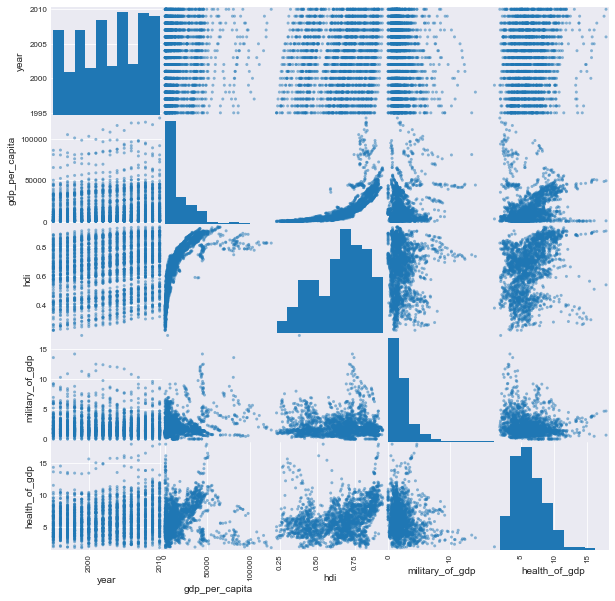

In [16]:
# Pre-explore the data (without null values) with a matrix of scatter plots:
scatter_matrix(df.dropna(), figsize=(10,10))
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1A: Are higher / lower HDI countries spending more on health or on the military?

In [17]:
# Drop nulls from the data we will work with on this particular question, this way we will keep the maximum amount of data:

df_q1 = df[['geo', 'year', 'hdi', 'military_of_gdp', 'health_of_gdp']].dropna()
df_q1.iloc[[0,1,-1]]

,geo,year,hdi,military_of_gdp,health_of_gdp
1,Albania,1995,0.628,2.10,2.56
2,Algeria,1995,0.600,2.96,4.17
3086,Zambia,2010,0.543,1.38,5.89


In [18]:
# See descriptive statistics for HDI, to further define the bin edges:

df_q1['hdi'].describe()

count    2249.000000
mean        0.654481
std         0.169743
min         0.230000
25%         0.519000
50%         0.684000
75%         0.792000
max         0.939000
Name: hdi, dtype: float64

In [19]:
# Divide HDI by 3 categories (Q1, IQR, Q4) and add a new column with these categories' names:

df_q1['hdi_category'] = pd.cut(df_q1['hdi'], [0.23,0.519,0.792,0.939], labels=['low', 'medium', 'high'])
df_q1.iloc[[0,1,-1]]

,geo,year,hdi,military_of_gdp,health_of_gdp,hdi_category
1,Albania,1995,0.628,2.10,2.56,medium
2,Algeria,1995,0.600,2.96,4.17,medium
3086,Zambia,2010,0.543,1.38,5.89,medium


In [20]:
# Group by 'hdi_category' and compare the mean values of spending % of GDP:

data = df_q1.groupby(['hdi_category'])['military_of_gdp', 'health_of_gdp', ].mean()
data

,military_of_gdp,health_of_gdp
hdi_category,,
low,2.145219,5.507918
medium,2.243483,5.800204
high,2.045877,7.975993


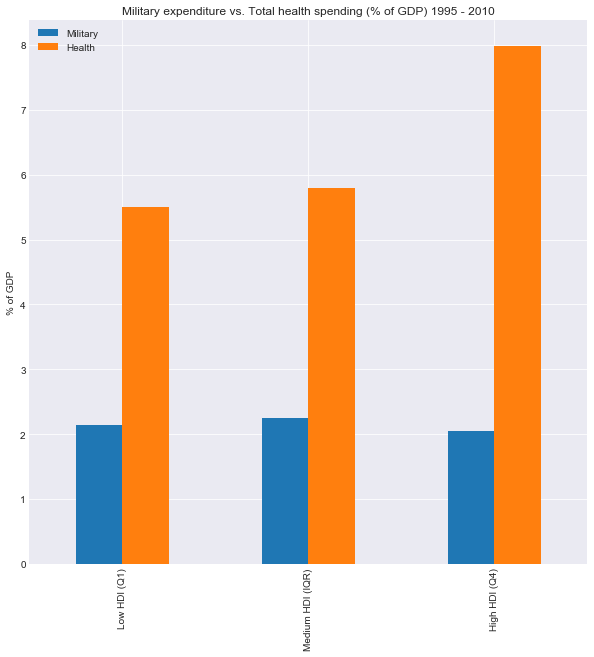

In [21]:
data.plot(kind="bar", figsize=(10,10))

plt.title('Military expenditure vs. Total health spending (% of GDP) 1995 - 2010')

plt.xlabel('')
plt.ylabel('% of GDP')
plt.legend(["Military", "Health"]);

columns = ['Low HDI (Q1)', 'Medium HDI (IQR)', 'High HDI (Q4)']
plt.xticks(range(len(columns)), columns)

plt.show()

Note than same country can fall into the different HDI category depending on the year. Here we focus more on HDI vs. spending % of GDP correlation, not on a country list.

### Research Question 1B: Are all countries always spending more on health rather than on the military?

In [22]:
# Let's check if there is any country that spent more on the military than on the health:
df_q2 = df.query('military_of_gdp > health_of_gdp').dropna() # drop nulls from the data we will work with
df_q2.iloc[[0,1,-1]]

,geo,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp
12,Bahrain,1995,43500,0.775,5.18,4.58
24,Brunei,1995,86100,0.805,6.04,2.67
3077,United Arab Emirates,2010,57600,0.824,6.04,3.66


In [23]:
# Check how many years each of resulting countries have spent more on the military:
data = df_q2.groupby(['geo']).size()
data

geo
Angola                  11
Bahrain                  9
Brunei                  11
Burundi                  4
Chad                     4
Congo, Rep.              2
Croatia                  3
Cyprus                   1
Djibouti                 5
Ethiopia                 1
Georgia                  1
Israel                   9
Kuwait                  16
Lao                      1
Libya                    2
Myanmar                  6
Oman                    11
Pakistan                16
Qatar                    1
Rwanda                   1
Saudi Arabia            16
Singapore               14
Sri Lanka                9
Sudan                    4
Syria                   13
Turkey                   3
United Arab Emirates    14
Yemen                   10
dtype: int64

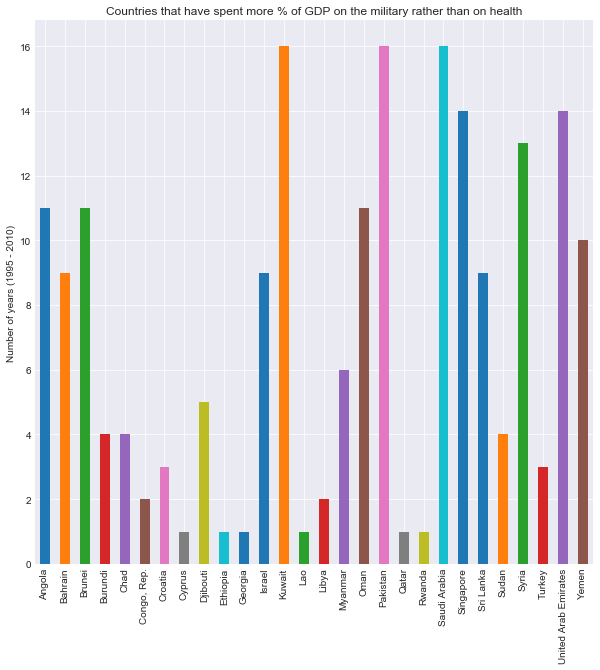

In [24]:
data.plot(kind="bar", figsize=(10,10))

plt.title('Countries that have spent more % of GDP on the military rather than on health')

plt.xlabel('')
plt.ylabel('Number of years (1995 - 2010)')

plt.show()

### Research Question 2: Is there a strong correlation between income per capita and military spendings?

In [25]:
# Drop nulls from the data we will work with on this particular question, this way we will keep the maximum amount of data:

df_q3 = df[['geo', 'year', 'gdp_per_capita', 'military_of_gdp']].dropna()
df_q3.iloc[[0,1,-1]]

,geo,year,gdp_per_capita,military_of_gdp
1,Albania,1995,4130,2.10
2,Algeria,1995,9300,2.96
4438,Zimbabwe,2017,1910,1.91


In [26]:
data = df_q3.groupby(['geo'])['gdp_per_capita', 'military_of_gdp'].mean()

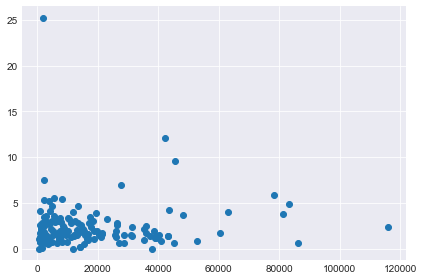

In [27]:
fig, ax = plt.subplots()
ax.scatter(data['gdp_per_capita'], data['military_of_gdp'])

ax.grid(True)
fig.tight_layout()

plt.show()

In [28]:
data['gdp_per_capita'].corr(data['military_of_gdp'])

0.0751691172157713

The correlation coefficient is close to zero, so there is no linear relationship here.

### Research Question 3: Is world spending more % of GDP on the military throughout the years?

In [29]:
data = df.groupby(['year'])['military_of_gdp'].mean()
data

year
1995    2.654972
1996    2.535867
1997    2.524861
1998    2.708878
1999    2.739326
2000    2.488559
2001    2.425678
2002    2.406470
2003    2.307545
2004    2.099148
2005    2.000968
2006    1.964351
2007    1.975242
2008    1.930699
2009    2.054591
2010    1.902473
2011    1.863102
2012    1.911000
2013    1.934876
2014    1.989246
2015    1.987397
2016    1.945786
2017    1.844346
2018         NaN
Name: military_of_gdp, dtype: float64

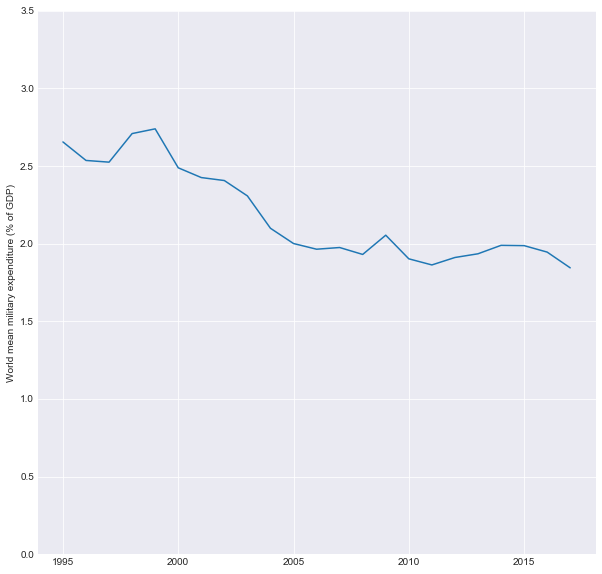

In [30]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(data)
ax.set_ylim(ymin=0, ymax=3.5)
plt.ylabel('World mean military expenditure (% of GDP)')
plt.show()

### Research Question 4: Do countries with higher HDI spend larger % of GDP on heath?

### Preparing the geo data

In [31]:
# To create a map, we would need a latitude and longitude for each country:

df_geo = pd.io.parsers.read_csv("https://opendata.socrata.com/api/views/mnkm-8ram/rows.csv?accessType=DOWNLOAD") 
df_geo.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),Icon
0,Albania,AL,ALB,8,41.0000,20.0,NaN
1,Algeria,DZ,DZA,12,28.0000,3.0,NaN
2,American Samoa,AS,ASM,16,-14.3333,-170.0,NaN
3,Andorra,AD,AND,20,42.5000,1.6,NaN
4,Angola,AO,AGO,24,-12.5000,18.5,NaN


In [32]:
# Cut off unnecessary columns and prepare names for joining:

df_geo.rename(columns={"Country": "geo"}, inplace=True)
df_geo = df_geo[['geo', 'Latitude (average)', 'Longitude (average)']]
df_geo.head()

,geo,Latitude (average),Longitude (average)
0,Albania,41.0000,20.0
1,Algeria,28.0000,3.0
2,American Samoa,-14.3333,-170.0
3,Andorra,42.5000,1.6
4,Angola,-12.5000,18.5


In [33]:
# Add latitude and longitude to our data set:

df_geo = df.merge(df_geo, how='left', on=['geo'])
df_geo.head()

,geo,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp,Latitude (average),Longitude (average)
0,Afghanistan,1995,881,0.324,NaN,NaN,33.0,65.0
1,Albania,1995,4130,0.628,2.10,2.56,41.0,20.0
2,Algeria,1995,9300,0.600,2.96,4.17,28.0,3.0
3,Andorra,1995,26100,NaN,NaN,7.64,42.5,1.6
4,Angola,1995,2970,NaN,4.28,3.79,-12.5,18.5


In [34]:
# Narrow down to EU countries

eu_list = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

df_eu = df_geo.query('geo in @eu_list')
df_eu.head()

,geo,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp,Latitude (average),Longitude (average)
9,Austria,1995,33700,0.816,1.06,9.52,47.3333,13.3333
16,Belgium,1995,32700,0.851,1.54,7.61,50.8333,4.0000
25,Bulgaria,1995,8450,0.702,2.38,5.24,43.0000,25.0000
42,Croatia,1995,12600,0.695,9.20,6.85,45.1667,15.5000
44,Cyprus,1995,26500,0.784,3.04,4.74,35.0000,33.0000


Check if we collected all countries by comparing the counts:

In [35]:
print (df_eu['geo'].nunique())
print (len(eu_list))

27
28


Something is not right here. Let's see which countries we do have:

In [36]:
df_eu.groupby(['geo']).mean()

,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp,Latitude (average),Longitude (average)
geo,,,,,,,
Austria,2006.5,41108.333333,0.856286,0.866783,10.143125,47.3333,13.3333
Belgium,2006.5,39150.000000,0.874905,1.173522,9.059375,50.8333,4.0000
Bulgaria,2006.5,13228.333333,0.746905,2.077826,6.528750,43.0000,25.0000
Croatia,2006.5,18695.833333,0.776333,2.983913,7.002500,45.1667,15.5000
Cyprus,2006.5,31304.166667,0.826000,2.387391,5.900625,35.0000,33.0000
Czech Republic,2006.5,25808.333333,0.840143,1.453739,6.791250,49.7500,15.5000
Denmark,2006.5,43408.333333,0.889476,1.396087,9.408750,56.0000,10.0000
Estonia,2006.5,21633.333333,0.809381,1.682261,5.848125,59.0000,26.0000
Finland,2006.5,37250.000000,0.865143,1.419130,8.015625,64.0000,26.0000


No Slovakia...

In [37]:
# Perhaps missing country was not included in the inicial data set?

df_test = df_geo.query('geo == "Slovakia"')
df_test.groupby(['geo']).mean()

# Yes, no such country here!

,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp,Latitude (average),Longitude (average)
geo,,,,,,,


In [38]:
# Let's check if the issue is name related:

df_test = df_geo.query('geo == "Slovak Republic"')
df_test.groupby(['geo']).mean()

# Yes, here we can confirm that correct name should be "Slovak Republic"!

,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp,Latitude (average),Longitude (average)
geo,,,,,,,
Slovak Republic,2006.5,21812.5,0.79619,1.611348,6.714375,NaN,NaN


Update the data frame with correct info:

In [39]:
# Update the data frame with correct info:

eu_list[eu_list.index("Slovakia")] = "Slovak Republic"
df_eu = df_geo.query('geo in @eu_list')

# Update latitude and longitude values for Slovak Republic:

df_eu.loc[df_eu['geo'] == "Slovak Republic", ['Latitude (average)','Longitude (average)']] = [48.669026, 19.699024]

# Check the result:
df_eu.groupby(['geo']).mean()


,year,gdp_per_capita,hdi,military_of_gdp,health_of_gdp,Latitude (average),Longitude (average)
geo,,,,,,,
Austria,2006.5,41108.333333,0.856286,0.866783,10.143125,47.333300,13.333300
Belgium,2006.5,39150.000000,0.874905,1.173522,9.059375,50.833300,4.000000
Bulgaria,2006.5,13228.333333,0.746905,2.077826,6.528750,43.000000,25.000000
Croatia,2006.5,18695.833333,0.776333,2.983913,7.002500,45.166700,15.500000
Cyprus,2006.5,31304.166667,0.826000,2.387391,5.900625,35.000000,33.000000
Czech Republic,2006.5,25808.333333,0.840143,1.453739,6.791250,49.750000,15.500000
Denmark,2006.5,43408.333333,0.889476,1.396087,9.408750,56.000000,10.000000
Estonia,2006.5,21633.333333,0.809381,1.682261,5.848125,59.000000,26.000000
Finland,2006.5,37250.000000,0.865143,1.419130,8.015625,64.000000,26.000000


In [40]:
print (df_eu['geo'].nunique())
print (len(eu_list))

28
28


### Drawing the world map

In [41]:
# Prepare map data:

df_map = df_geo[['geo', 'hdi', 'health_of_gdp', 'Latitude (average)', 'Longitude (average)']].dropna()

# Group data by country:

df_map = df_map.groupby(['geo']).mean() # mean will not affect latitude and longitude per country
df_map.head()

,hdi,health_of_gdp,Latitude (average),Longitude (average)
geo,,,,
Afghanistan,0.415444,6.860000,33.0,65.0
Albania,0.679438,5.932500,41.0,20.0
Algeria,0.663625,3.779375,28.0,3.0
Andorra,0.819000,7.520000,42.5,1.6
Angola,0.437083,2.731667,-12.5,18.5


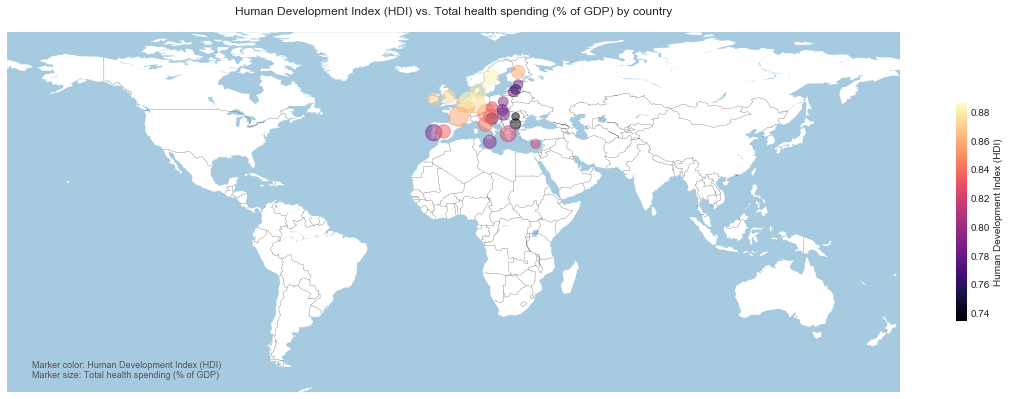

In [50]:
# Make the background map
plt.figure(figsize=(20,10))

m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='white', alpha=1)
m.drawcountries(linewidth=0.2, color="black")

# Plotting data on a map
m.scatter(df_map['Longitude (average)'], df_map['Latitude (average)'], s=df_map['health_of_gdp']**2.5, alpha=0.5, c=df_map['hdi'], cmap="magma", zorder=10)

plt.text(-170, -60,'Marker color: Human Development Index (HDI)\nMarker size: Total health spending (% of GDP)', ha='left', va='bottom', size=9, color='#555555' )

# Making a color bar ledend
vmin = min(df_map['hdi']); vmax = max(df_map['hdi'])
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap="magma")
mapper.set_array(df_map['hdi'])
plt.colorbar(mapper, shrink=0.4).set_label('Human Development Index (HDI)')

plt.title('Human Development Index (HDI) vs. Total health spending (% of GDP) by country\n')
plt.show()

In [43]:
df_map['hdi'].corr(df_map['health_of_gdp'])

0.320533531903451

Here, we see a weak uphill (positive) linear relationship.

### Drawing the EU map

In [44]:
# Prepare data for the EU map:

df_map = df_eu[['geo', 'hdi', 'health_of_gdp', 'Latitude (average)', 'Longitude (average)']].dropna()

# Group data by country:

df_map = df_map.groupby(['geo']).mean() # mean will not affect latitude and longitude per country
df_map.head()

,hdi,health_of_gdp,Latitude (average),Longitude (average)
geo,,,,
Austria,0.845875,10.143125,47.3333,13.3333
Belgium,0.869813,9.059375,50.8333,4.0000
Bulgaria,0.734563,6.528750,43.0000,25.0000
Croatia,0.762563,7.002500,45.1667,15.5000
Cyprus,0.817875,5.900625,35.0000,33.0000


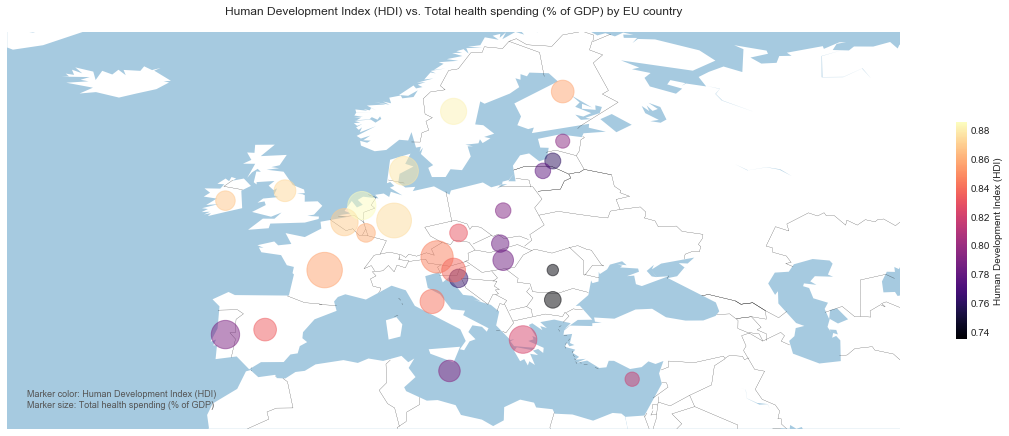

In [51]:
# Make the background map

plt.figure(figsize=(20,10)) # width, height in inches

m=Basemap(llcrnrlon=-30, llcrnrlat=30, urcrnrlon=60, urcrnrlat=70)

m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='white', alpha=1)
m.drawcountries(linewidth=0.2, color="black")

# Plotting data on a map
m.scatter(df_map['Longitude (average)'], df_map['Latitude (average)'], s=df_map['health_of_gdp']**3, alpha=0.5, c=df_map['hdi'], cmap="magma", zorder=10)

plt.text(-28, 32,'Marker color: Human Development Index (HDI)\nMarker size: Total health spending (% of GDP)', ha='left', va='bottom', size=9, color='#555555' )

# Making a color bar ledend
vmin = min(df_map['hdi']); vmax = max(df_map['hdi'])
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap="magma")
mapper.set_array(df_map['hdi'])
plt.colorbar(mapper, shrink=0.4).set_label('Human Development Index (HDI)')

plt.title('Human Development Index (HDI) vs. Total health spending (% of GDP) by EU country\n')
plt.show()

In [46]:
df_map['hdi'].corr(df_map['health_of_gdp'])

0.6658137981846676

Here, we see a stronger uphill (positive) linear relationship.

### Research Question 5: Did the distribution shape of personal income change throughout the years?

Let's compare 2018, 2013 & 2008 data:

In [47]:
# 2018:

data = df[['geo', 'year', 'gdp_per_capita']].dropna()

data_2018 = data.query('year == "2018"')
print(data_2018.iloc[[0,1,-1]])

# 2013:

data_2013 = data.query('year == "2013"')
print(data_2013.iloc[[0,1,-1]])

# 2008:

data_2008 = data.query('year == "2008"')
print(data_2008.iloc[[0,1,-1]])

              geo  year  gdp_per_capita
4439  Afghanistan  2018            1870
4440      Albania  2018           12400
4631     Zimbabwe  2018            1950
              geo  year  gdp_per_capita
3474  Afghanistan  2013            1810
3475      Albania  2013           10500
3666     Zimbabwe  2013            1900
              geo  year  gdp_per_capita
2509  Afghanistan  2008            1300
2510      Albania  2008            9150
2701     Zimbabwe  2008            1210


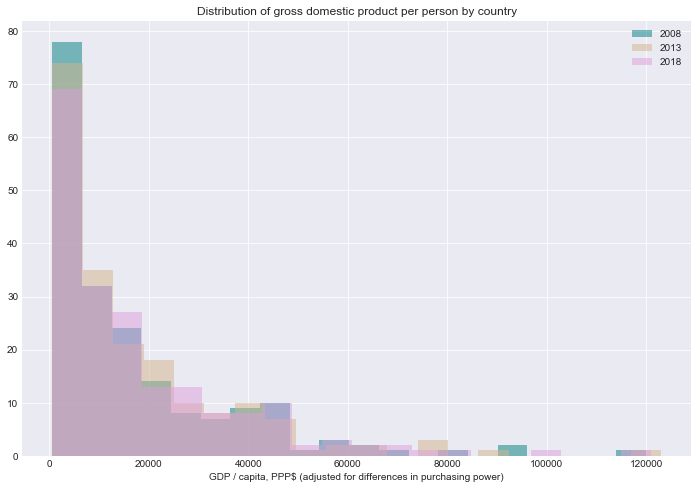

In [48]:
plt.figure(figsize=(12,8))

plt.hist(data_2008['gdp_per_capita'], bins=20, alpha=0.5, label='2008', color="teal")
plt.hist(data_2013['gdp_per_capita'], bins=20, alpha=0.5, label='2013', color="tan")
plt.hist(data_2018['gdp_per_capita'], bins=20, alpha=0.5, label='2018', color="plum")

plt.legend(loc='upper right')

plt.title('Distribution of gross domestic product per person by country')
plt.xlabel('GDP / capita, PPP$ (adjusted for differences in purchasing power)')
plt.show()


<a id='conclusions'></a>
## Conclusions

### 1A. Are higher / lower HDI countries spending more on health or on the military?
Our research suggests that **countries with higher Human Development Index are more likely to spend larger % of GDP on heath and lower % of GDP on military**.
#### 1B. Are all countries always spending more on health rather than on the military?
While it might look so from the Question 1A plot, it is not necessarily true. There are countries which sometimes choose to spend more on the military. **Kuwait, Pakistan and Saudi Arabia** have done that for all 16 years included in the Question 1B data frame.

### 2. Is there a strong correlation between income per capita and military spendings?
Our research didn't show any linear relationship between mean GDP per capita and mean military expenditure. We can not confirm that countries with higher / lower income per person spent more on military.

### 3. Is world spending more % of GDP on the military throughout the years?

If we compare by mean % value for 1995 - 2017 data, there is a negative trend. It seems like the **world is spending less % of GDP on the military over time**.

### 4. Do countries with higher HDI spend larger % of GDP on health?
For the **European Union, it might be true that countries with higher HDI spend more of GDP on health**, while for the world in general the correlation is quite weak.

### 5: Did the distribution shape of personal income change throughout the years?
Our comparison of 2018, 2013 and 2008 data show that the **distribution shape of personal income stays very similar** over the years. The shape is technically multimodal, but is also rather positively skewed, which means that **most countries fall into the lower personal income bins**.

<a id='credits'></a>
## Credits

Author: I. Kacewica

* "HDI" image: http://hdr.undp.org/ (Human Development Report)
* Main data: https://www.gapminder.org/data/ (Gapminder)
* Latitude and longitude data: https://opendata.socrata.com/ (Socrata)


© 2018 All rights reserved